In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split

In [3]:
data = np.load("dataset.npz")
X = np.concatenate([data['augmented_tremor'],data['augmented_normal'],data['augmented_static']]).transpose(0,2,1)
Y = np.concatenate([data['gt_tremor'],data['gt_normal'],data['gt_static']])

np.shape(X)

(1800, 20, 3)

In [4]:
X = np.expand_dims(np.sqrt(np.sum(X**2,axis=-1)),axis=-1)
np.shape(X)

(1800, 20, 1)

In [5]:
num_samples = 1800
window_size = 100
num_classes = 3

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [6]:
model = Sequential([
    # Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, 3)),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='sigmoid'),
    # Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4718 - loss: 1.0201 - val_accuracy: 0.6444 - val_loss: 0.5918
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6784 - loss: 0.5685 - val_accuracy: 0.8639 - val_loss: 0.4822
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8436 - loss: 0.4703 - val_accuracy: 0.8528 - val_loss: 0.4301
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8288 - loss: 0.4167 - val_accuracy: 0.8611 - val_loss: 0.3339
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8684 - loss: 0.3286 - val_accuracy: 0.8528 - val_loss: 0.3221
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8631 - loss: 0.3077 - val_accuracy: 0.8861 - val_loss: 0.2600
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8491 - loss: 0.3015 - val_accuracy: 0.8833 - val_loss: 0.2643
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8427 - loss: 0.3103 - val_accuracy: 0.8639 - val_loss:

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8847 - loss: 0.2239 
Test Accuracy: 0.89
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


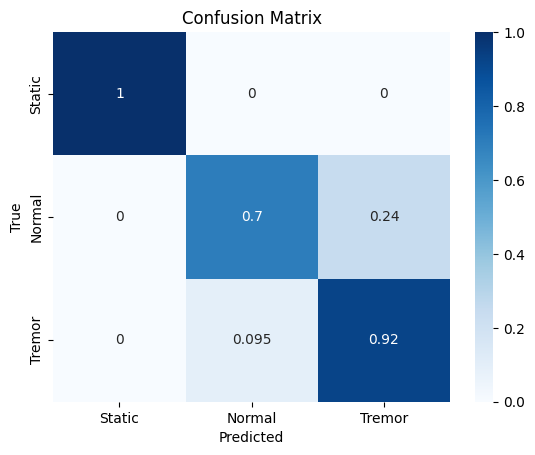

In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
total = np.sum(cm,axis=1)
sns.heatmap(cm/total, annot=True, cmap="Blues", xticklabels=["Static", "Normal", "Tremor"], yticklabels=["Static", "Normal", "Tremor"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


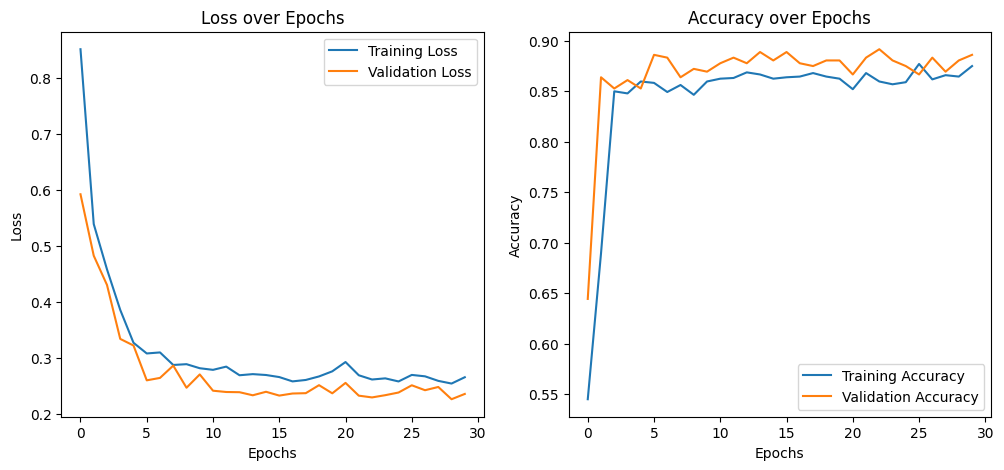

In [10]:
import matplotlib.pyplot as plt

# Extract values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create figure
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

# Show plots
plt.show()


In [11]:
model.save("my_model_updates.h5")

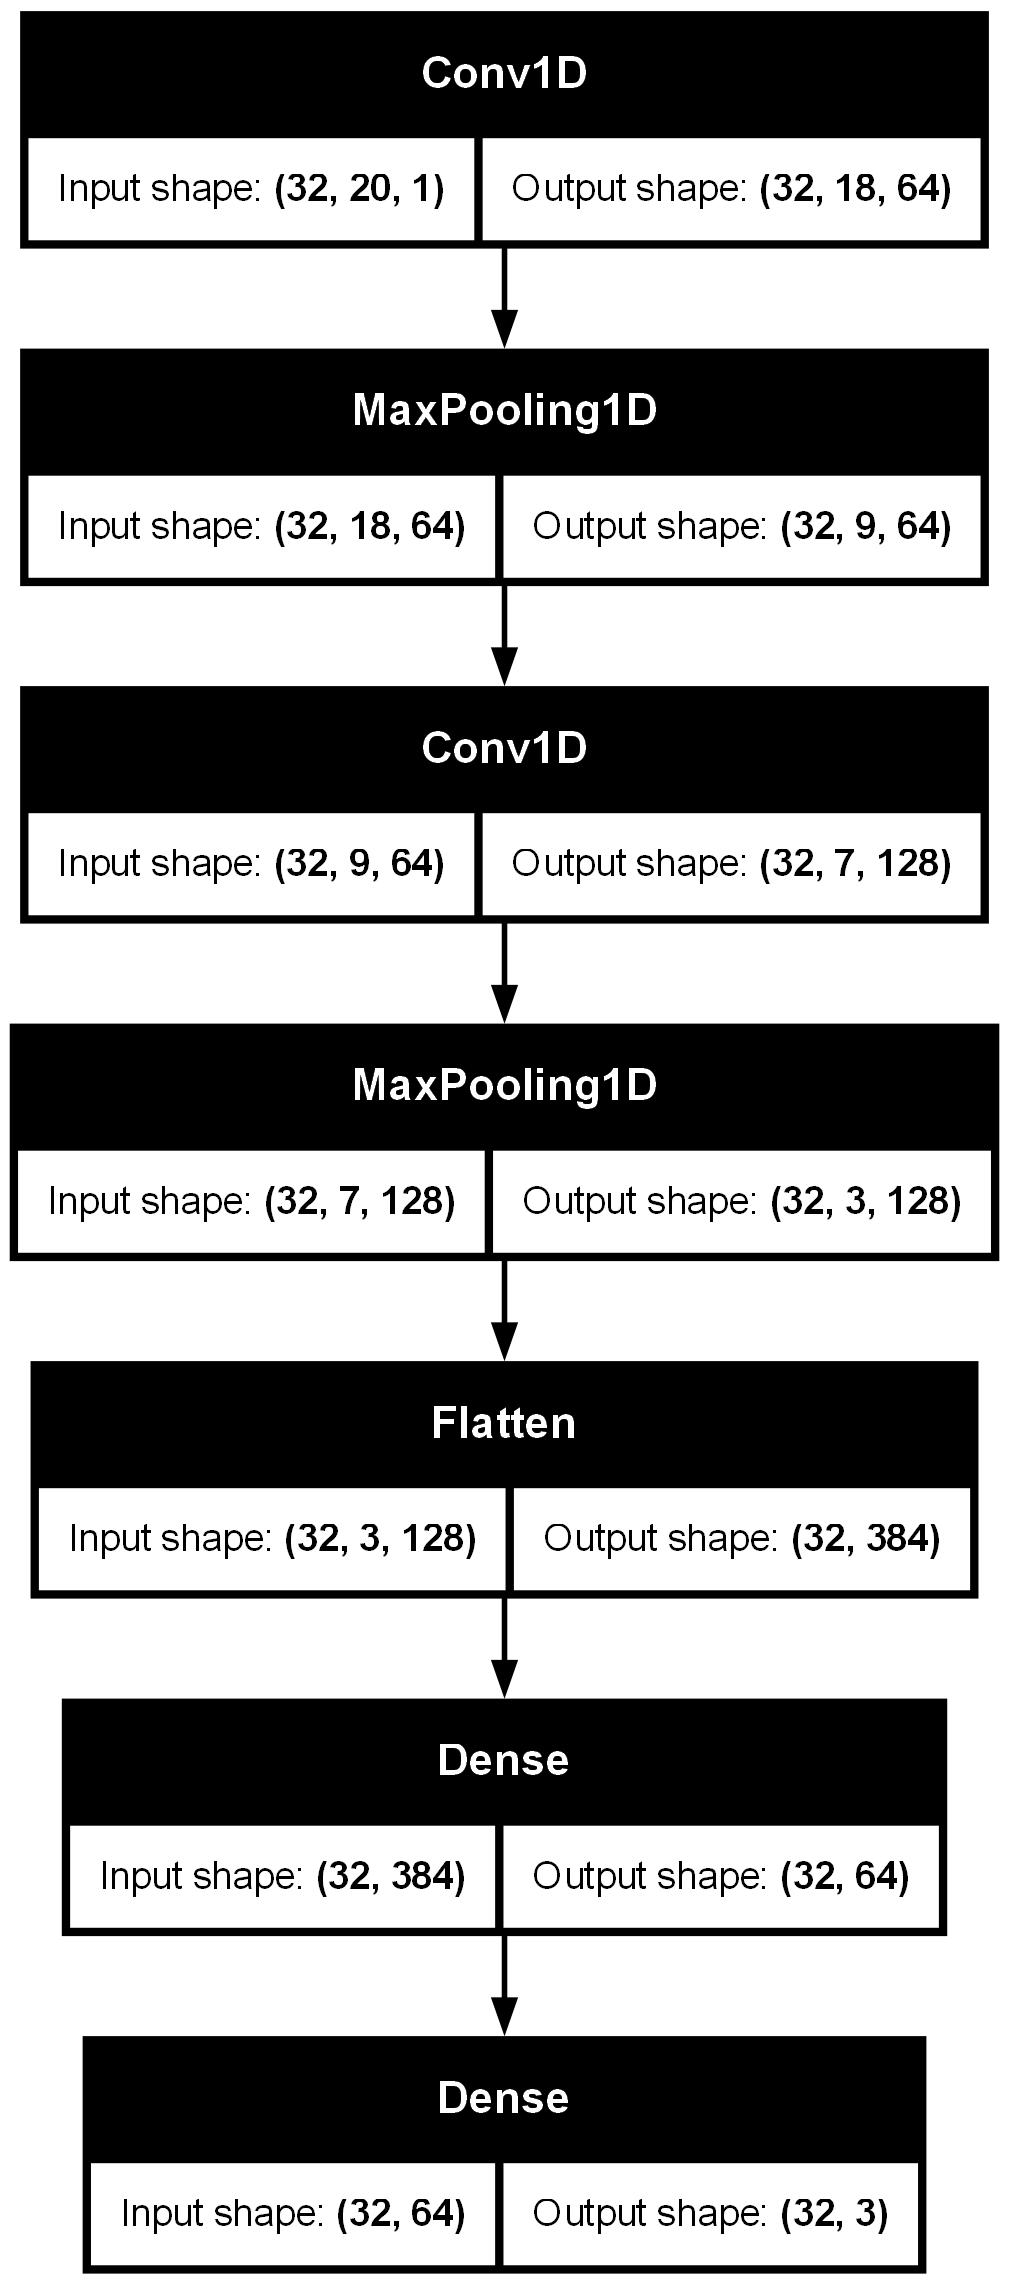

In [12]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file="model.png", show_shapes=True)

c:\Users\xings\AppData\Local\Programs\Python\Python311\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


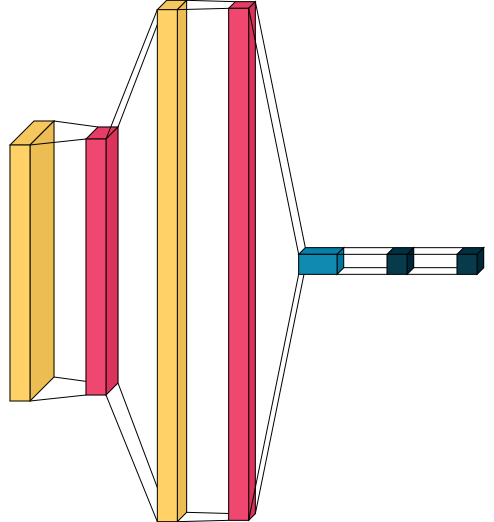

In [13]:
import visualkeras
visualkeras.layered_view(model, legend=False, draw_volume=True, spacing=50)